<h1>HEART FAILURE PREDICTION USING 
MULTIPE ALGORITHMS</h1>

<h2>Introduction</h2>
<p>The proposed system is the prediction of Heart failure using Multiple Algorithms such as:

- Logistic Regression
    
- K-Nearest Neighbors (KNN)
    
- Decision Trees
    
- Support Vector Classifier (SVC)
    
- Random Forest
- XGBoost
- Voting Ensemble

**Dataset:**
    
918 records with 12 features (e.g., age, cholesterol levels, heart rate, and heart disease status).

**Evaluation Metrics:** Accuracy, precision, and recall.

**Key Findings:**

The Voting Ensemble model achieved the highest accuracy (87.83%) and precision (91.27%).
The Voting Ensemble combined the strengths of individual models for more reliable predictions. The objective of this project is to forecast the risk factors causing Heart failure.</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

    
1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Data Cleaning](#DataCleaning)
5. [Exploratory Data Analysis](#EDA)
6. [Feature Engineering/Data Normalization](#Feature)
7. [Model Building](#Modelling)
    

<a name="Libraries"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>1. Importing libraries</b>

In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import svm
import tensorflow as tf
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score #To split data
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingClassifier, VotingClassifier
from sklearn.metrics import mean_squared_error, r2_score, precision_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay #For evaluating built models

<a name="Data"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>2. Loading data</b>

In [2]:
dataset = pd.read_csv(r'C:\Users\ADMIN\Documents\archive\heart.csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
dataset.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


<a name="Statistics"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>3. Statistical summaries</b>

In [4]:
# Identifying the datatype for every Variable
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
dataset.shape

(918, 12)

There are a regular data quantity to train model.

<a name="DataCleaning"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>4. Data Cleaning</b>

In [7]:
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Dataset do not have missing data, which is good.

In [8]:
dataset['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

There are two classes well balanced.

<a name="EDA"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>5. Exploratory Data Analysis</b>

### 1. Chestpain in Relation to Heart Disiease

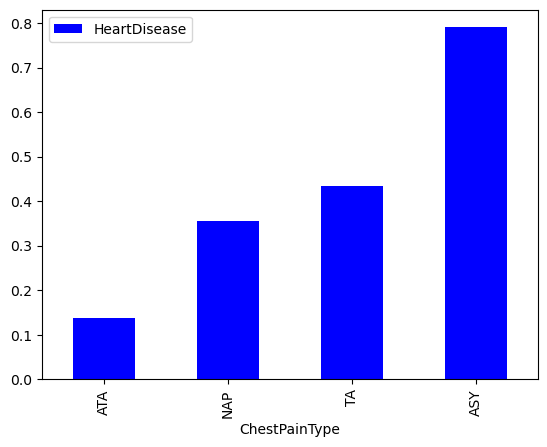

In [9]:
dic = dataset[['ChestPainType', 'HeartDisease']].groupby('ChestPainType').mean().sort_values(by = 'HeartDisease')
dic.plot(kind = 'bar', color = 'blue')
plt.show()

The most frequent chest pain in heart diseases seems to be asymptomatic (`ASY`).

### 2. Ages Distribution

Text(0.5, 0.98, 'Ages distribution related to Heart Disease')

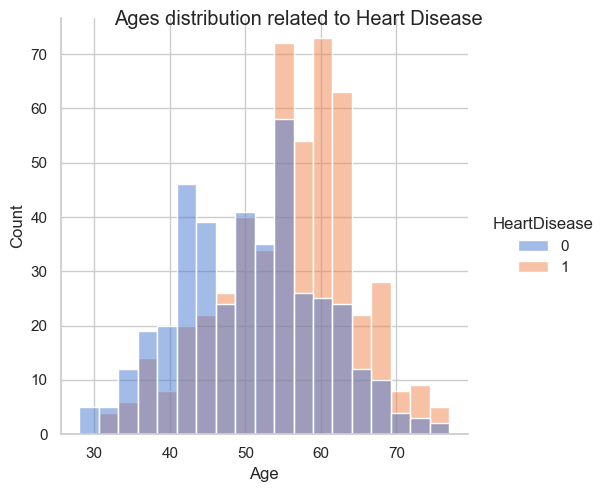

In [10]:
sns.set_theme(style = 'whitegrid', palette = 'muted')
ax = sns.displot(
    x = 'Age',
    hue = 'HeartDisease',
    data = dataset
)
ax.fig.suptitle('Ages distribution related to Heart Disease')

The histogram shows a **strong relationship between age and heart disease**, which is more frequent in older individuals. This relationship is more visible in boxplot:

Text(0.5, 1.0, 'Age related to Heart Disease')

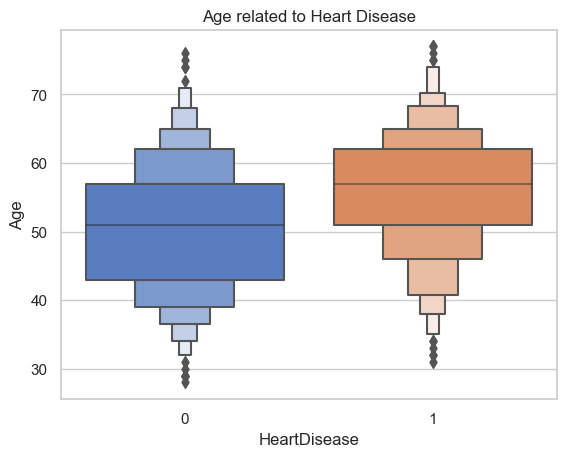

In [11]:
ax = sns.boxenplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Age'
)
ax.set_title('Age related to Heart Disease')

### 3. Sex/Gender in relation to heart Disease

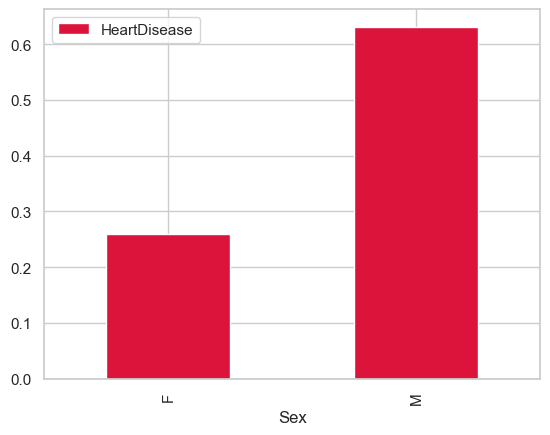

In [12]:
dic = dataset[['HeartDisease', 'Sex']].groupby('Sex').mean()
dic.plot(kind = 'bar', color = 'crimson')
plt.show()

In [13]:
sex_totals = dataset['Sex'].value_counts()
heart_disease_totals = dataset.query('HeartDisease == 1')['Sex'].value_counts()
print('Heart disease rate on males: %.2f' % ((heart_disease_totals['M'] / sex_totals['M']) * 100))
print('Heart disease rate on females: %.2f' % ((heart_disease_totals['F'] / sex_totals['F']) * 100))

Heart disease rate on males: 63.17
Heart disease rate on females: 25.91


Data indicates that **males are more susceptible to heart diseases** than females. **However, that is a great difference between the total of males and females on dataset.**

### 4. Cholesterol in relation to Heart Disease

Text(0.5, 1.0, 'Cholesterol related to Heart Disease')

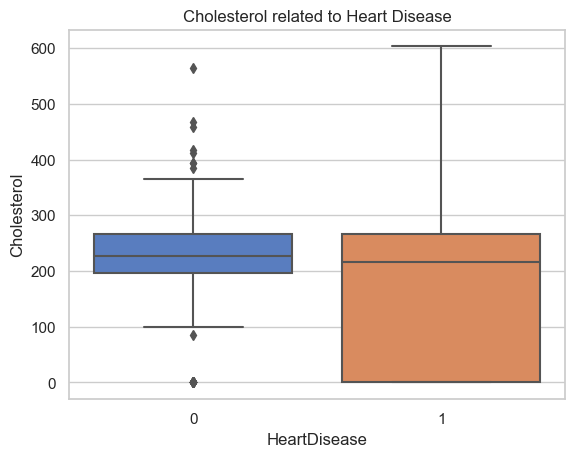

In [14]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Cholesterol'
)
ax.set_title('Cholesterol related to Heart Disease')

Peharps there are many outliers candidates, there are not great difference between classes mean.

### 5. Resting Blood Pressure (mmHg) related to Heart Diseases

Text(0.5, 1.0, 'Resting Blood Pressure (mmHg) related to Heart Diseases')

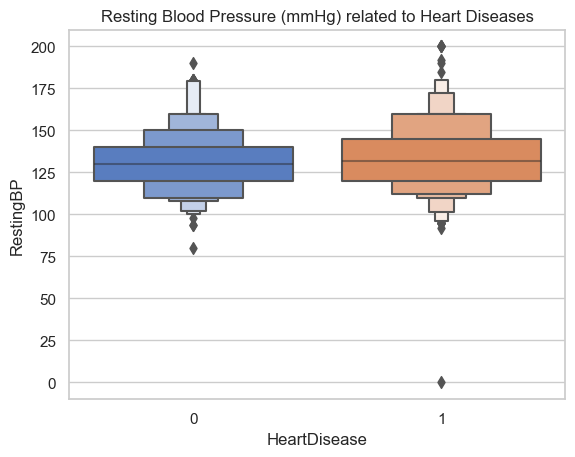

In [15]:
ax = sns.boxenplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'RestingBP'
)
ax.set_title('Resting Blood Pressure (mmHg) related to Heart Diseases')

There is a outlier with blood pressure equal `0` that is probably a missing data. I'll removing it from visualization:

Text(0.5, 1.0, 'Resting Blood Pressure (mmHg) related to Heart Diseases')

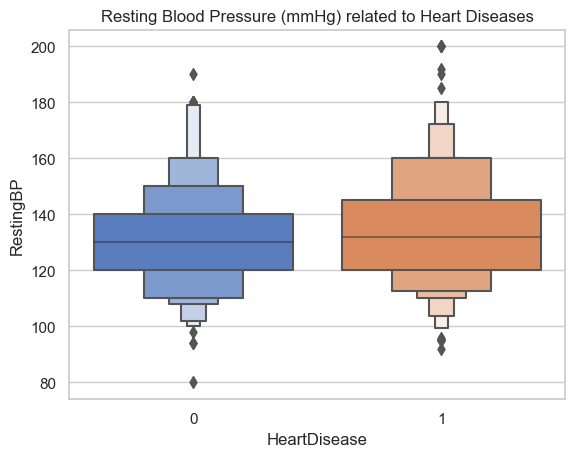

In [16]:
ax = sns.boxenplot(
    data = dataset.query('RestingBP > 0'),
    x = 'HeartDisease',
    y = 'RestingBP'
)
ax.set_title('Resting Blood Pressure (mmHg) related to Heart Diseases')

Despite outliers, there is little difference between resting blood pressure between classes.

### 6. Maximun Heart Rate related to Heart Diseases

Text(0.5, 1.0, 'Maximun Heart Rate related to Heart Diseases')

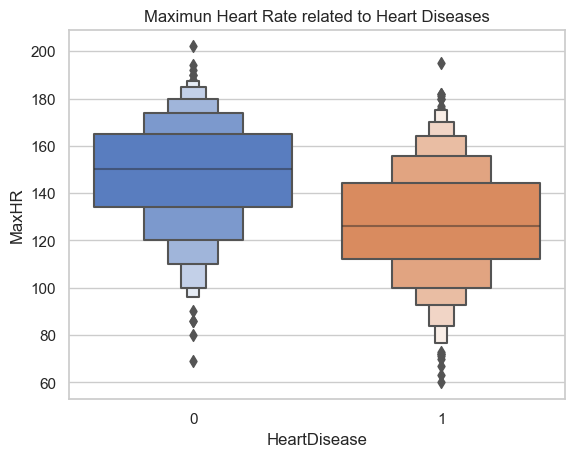

In [17]:
ax = sns.boxenplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'MaxHR'
)
ax.set_title('Maximun Heart Rate related to Heart Diseases')

There is a great difference on maximun heart rate mean between classes.

### 7. Fasting Blood Sugar in relation to Heart Disease

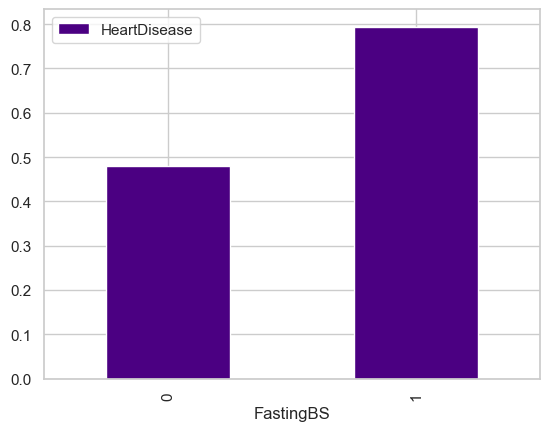

In [18]:
dic = dataset[['FastingBS', 'HeartDisease']].groupby('FastingBS').mean().sort_values(by = 'HeartDisease')
dic.plot(kind = 'bar', color = 'indigo')
plt.show()

Text(0.5, 0.98, 'Fasting Blood Sugar (> 120 mg/dl)')

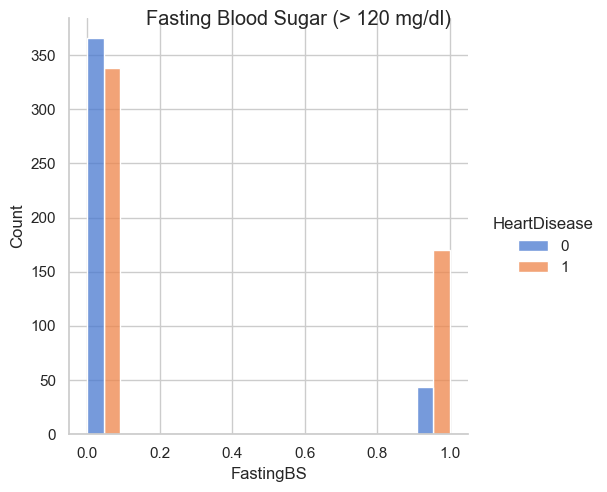

In [19]:
ax = sns.displot(
    data = dataset,
    x = 'FastingBS',
    hue = 'HeartDisease',
    multiple = 'dodge'
)
ax.fig.suptitle('Fasting Blood Sugar (> 120 mg/dl)')

Fasting blood sugar over 120 mg/dl seems to be more frequent on patients with heart diseases.

### 8. Resting ECG

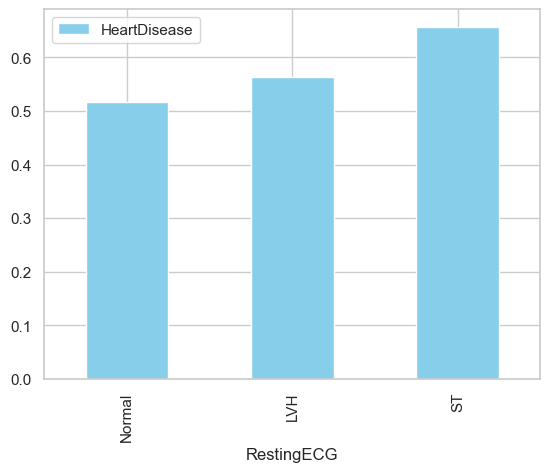

In [20]:
dic = dataset[['RestingECG', 'HeartDisease']].groupby('RestingECG').mean().sort_values(by = 'HeartDisease')
dic.plot(kind = 'bar', color = 'skyblue')
plt.show()

Text(0.5, 0.98, 'Resting Eletrocardiogram Result related to Heart Diseases')

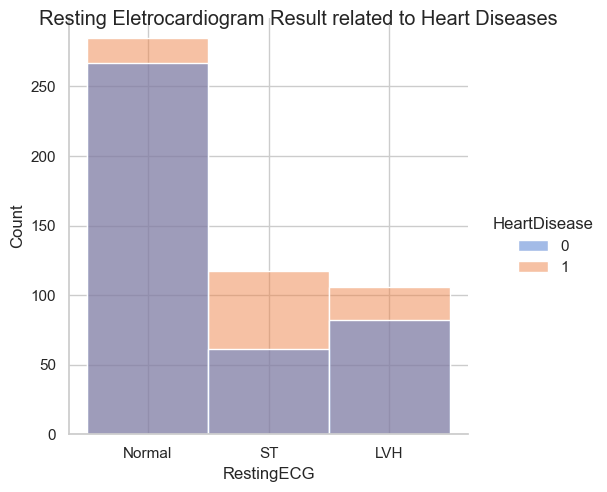

In [21]:
ax = sns.displot(
    data = dataset,
    x = 'RestingECG',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Resting Eletrocardiogram Result related to Heart Diseases')

### 9. Exercise-induced Angina related to Heart Diseases

Text(0.5, 0.98, 'Exercise-induced Angina related to Heart Diseases')

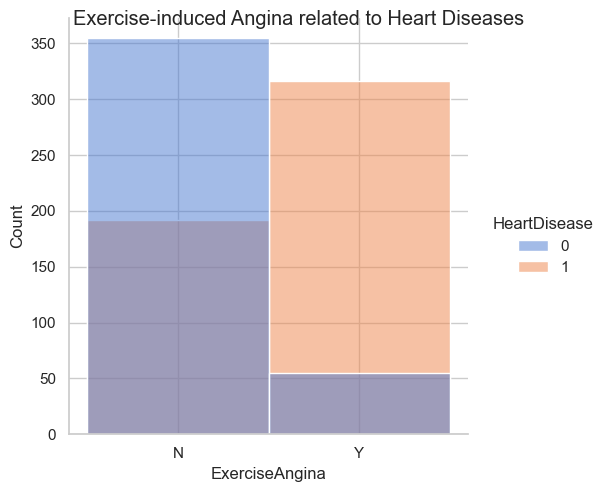

In [22]:
ax = sns.displot(
    data = dataset,
    x = 'ExerciseAngina',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Exercise-induced Angina related to Heart Diseases')

The exercise-induced angina presence seems to be more related to heart diseases.

### 10. Old Peak related to Heart Diseases

Text(0.5, 1.0, 'Old Peak related to Heart Diseases')

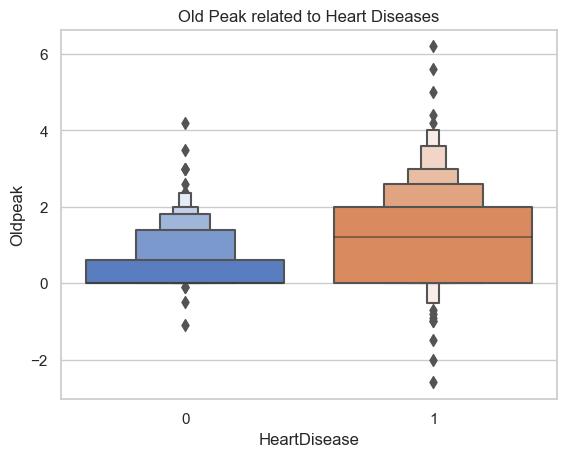

In [23]:
ax = sns.boxenplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Oldpeak'
)
ax.set_title('Old Peak related to Heart Diseases')

Oldpeak are strong related to heart diseases development.

### 11. ST_slope related to Heart Disease

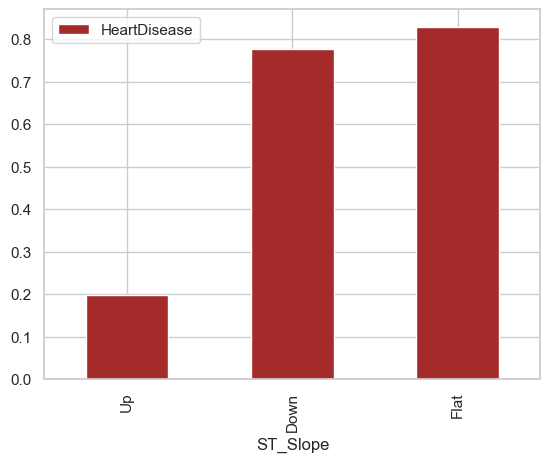

In [24]:
dic = dataset[['ST_Slope', 'HeartDisease']].groupby('ST_Slope').mean().sort_values(by = 'HeartDisease')
dic.plot(kind = 'bar', color = 'brown')
plt.show()

Text(0.5, 0.98, 'Slope of the peak exercise related to Heart Diseases')

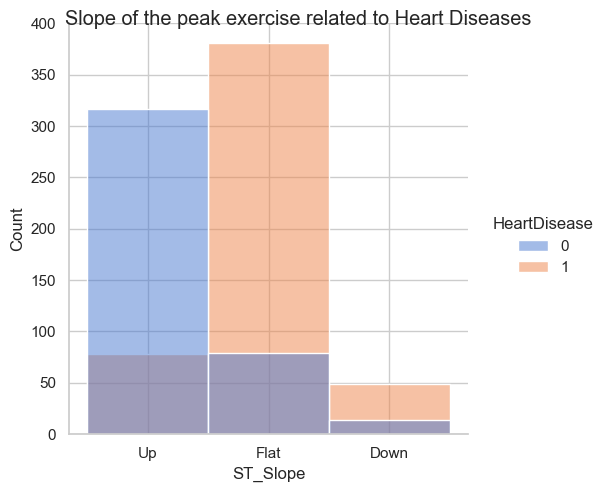

In [25]:
ax = sns.displot(
    data = dataset,
    x = 'ST_Slope',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Slope of the peak exercise related to Heart Diseases')

Patients with `ST_Slope` values equals `Flat` or `Down` seems to be more susceptible to heart diseases.

<a name="Feature"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>6. Feature Engineering / Data Normalization</b>

## Fixing Outliers

In [26]:
def Fix_outliers(data, feature, method, upper = None, lower = None, impute = None):
    """
Function for fixing outliers using various methods, It takes the dataframe, columns,method for fixing, upper percentile
value none by default,lower percentile value, none by default and impute none by default as parameters. 

There are three methods for fixing in this function :
Imputation = Using another constant value to replace the outlier
Capping = Replacing outliers with the upper and lower percentile values
Log_transform = Getting the logrithm values of the column values and using it to transform the values
    """
    if method.lower() == 'imputation': #Checking condition for imputation
        Q1 = data[feature].quantile(lower) # Storing value for upper limit
        Q3 = data[feature].quantile(upper) # Storing values for lower limit
        print(data[feature].skew()) # Printing the skewness of the feature
        data[feature] = np.where(data[feature] < Q1, impute, data[feature] ) #Replace outliers with an imputted value and assign it to the feature,lower limit
        data[feature] = np.where(data[feature] > Q3, impute, data[feature] )# Replace outlierswith an imputted and assign it to feature, upper limit
        print(df[feature].skew())# Printing the skewness of the feature afterwards
        return data[feature] # Return the fixed feature
    elif method.lower() == 'capping': # Checking condition for capping
        Q1 = data[feature].quantile(lower) #Assign value for lower limit
        Q3 = data[feature].quantile(upper) # Assign value for upper limit
        print(data[feature].skew()) # Print the skewness of the feature
        data[feature] = np.where(data[feature] < Q1, Q1, data[feature] ) #Replace outliers with the lower limit value and assign it to the feature
        data[feature] = np.where(data[feature] > Q3, Q3, data[feature] ) # Replace outliers with the upper limit value and assign it to the feature
        print(data[feature].skew()) # Print the skewness of the feature
        return data[feature] #Return the fixed feature
    elif method.lower() == 'log_transform': # Checking condition for log_transform
        print(data[feature].skew()) #Print skewness of the feature
        data[feature] = np.log(data[feature]) + 1 # Performing the log transformation
        print(data[feature].skew()) # print the skewness after fixing
        return data[feature] # Return the feature

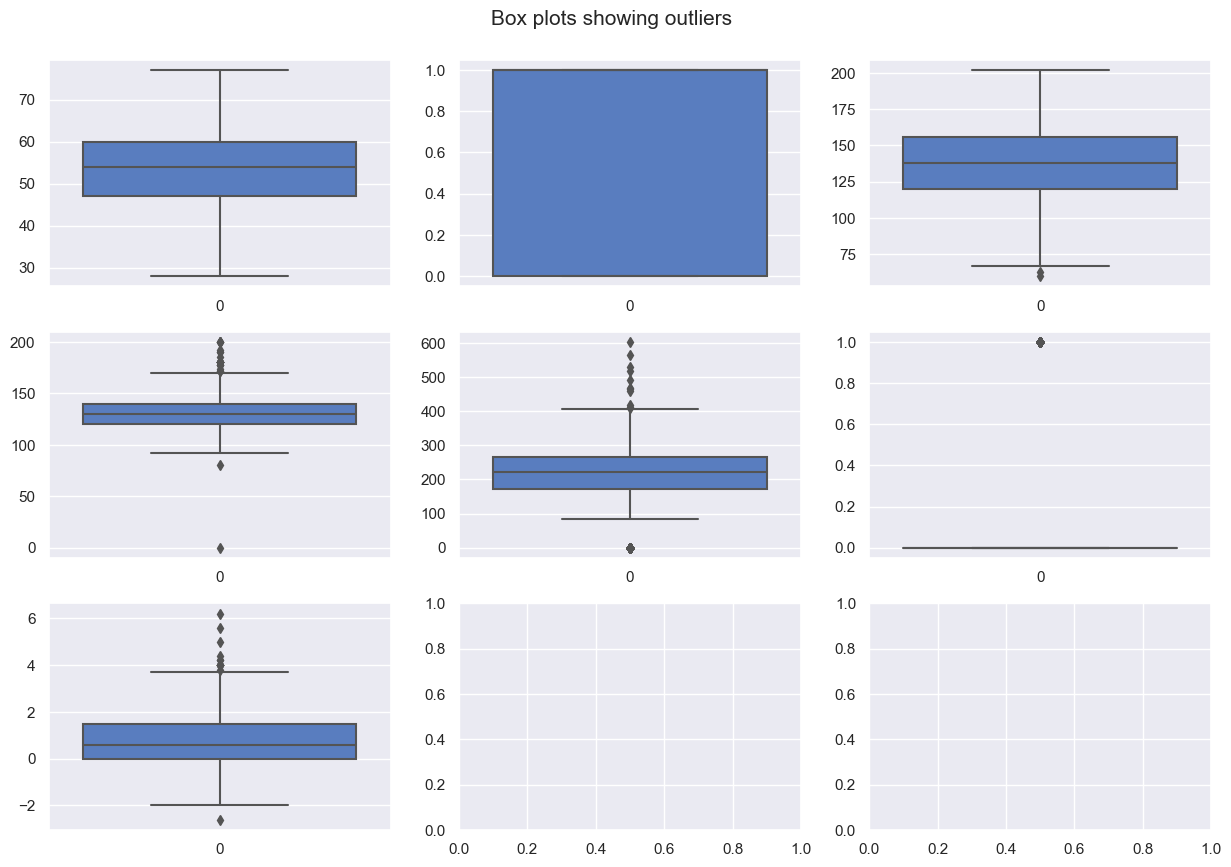

In [27]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), dataset, ['Age',	'HeartDisease',	'MaxHR',	'RestingBP',	'Cholesterol',	'FastingBS',	'Oldpeak']):
  sns.boxplot(dataset[name], ax = ax)

In [28]:
dataset['MaxHR'] = Fix_outliers(dataset, 'MaxHR', 'capping', 0.95, 0.05)

dataset['RestingBP'] = Fix_outliers(dataset, 'RestingBP', 'capping', 0.95, 0.05)

dataset['Cholesterol'] = Fix_outliers(dataset, 'Cholesterol', 'capping', 0.95, 0.05)

dataset['FastingBS'] = Fix_outliers(dataset, 'FastingBS', 'capping', 0.95, 0.05)

dataset['Oldpeak'] = Fix_outliers(dataset, 'Oldpeak', 'capping', 0.95, 0.05)

-0.14435941846180994
-0.008918888358171737
0.1798393100516288
0.21896396088877224
-0.6100864307268192
-0.9521806792097705
1.2644841750727027
1.2644841750727027
1.0228720218107528
0.7595629567027858


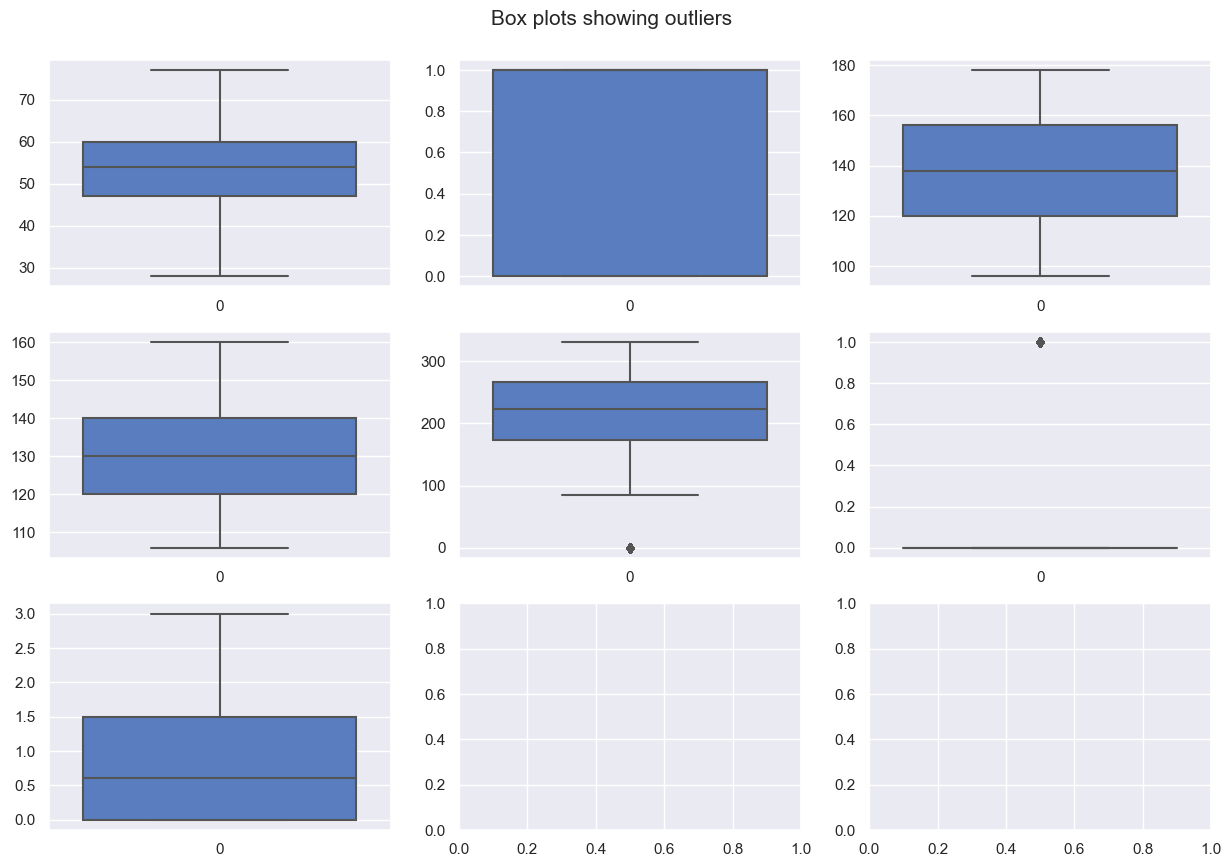

In [29]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), dataset, ['Age',	'HeartDisease',	'MaxHR',	'RestingBP',	'Cholesterol',	'FastingBS',	'Oldpeak']):
  sns.boxplot(dataset[name], ax = ax)

- 95% of the outliers has been fixed

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


## Label encoder

In [31]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original data
dataset1 = dataset.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns with object data type
object_columns = ["Sex", "ChestPainType", "RestingECG","ExerciseAngina","ST_Slope"]

# Apply label encoding to each object column
for col in object_columns:
    dataset1[col] = label_encoder.fit_transform(dataset1[col])

# Now, all the object columns have been converted to integers
# You can check the data types to confirm
print(dataset1.dtypes)

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG          int32
MaxHR             float64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object


In [32]:
dataset1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0.0,1,172.0,0,0.0,2,0
1,49,0,2,160.0,180.0,0.0,1,156.0,0,1.0,1,1
2,37,1,1,130.0,283.0,0.0,2,98.0,0,0.0,2,0
3,48,0,0,138.0,214.0,0.0,1,108.0,1,1.5,1,1
4,54,1,2,150.0,195.0,0.0,1,122.0,0,0.0,2,0


# Correlation Matrix

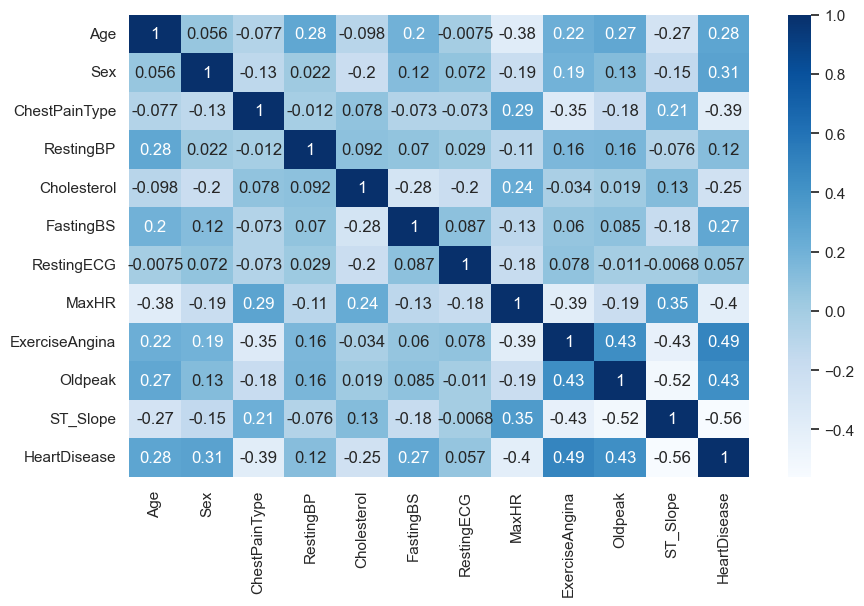

In [33]:
corr_matrix = dataset1.corr()
def absolute(x):
    return np.abs(x)
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues')
plt.show()

### Feature Importance

In [34]:
# Checking for feature importance
X = dataset1.drop('HeartDisease', axis=1)
y= dataset1['HeartDisease']
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['features','scores']
feature_scores

,features,scores
0,Age,79.160779
1,Sex,94.253184
2,ChestPainType,161.185346
3,RestingBP,12.428747
4,Cholesterol,59.917129
5,FastingBS,70.478543
6,RestingECG,3.026321
7,MaxHR,178.397057
8,ExerciseAngina,296.144771
9,Oldpeak,211.110884


`RestingECG` and `RestingBP` has the least importance towards the target data `HeartDisease`. While `ST_Slope` and `ExerciseAngina` has the highest importance towards the target data.

### Dropping the least important values.

In [35]:
dataset1 = dataset1.drop(columns =['RestingECG','RestingBP'])

<a name="Modelling"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>7. Model Building</b>

### Data splitting

In [36]:
y = dataset1['HeartDisease']
X = dataset1.drop(columns = ['HeartDisease'])

In [37]:
X.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,289.0,0.0,172.0,0,0.0,2
1,49,0,2,180.0,0.0,156.0,0,1.0,1
2,37,1,1,283.0,0.0,98.0,0,0.0,2
3,48,0,0,214.0,0.0,108.0,1,1.5,1
4,54,1,2,195.0,0.0,122.0,0,0.0,2


In [38]:
X.shape

(918, 9)

## Normalize

In [39]:
data = RobustScaler().fit_transform(X)

In [40]:
y.shape

(918,)

In [41]:
# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.25, random_state=42
)

In [42]:
y_test

668    0
30     1
377    1
535    1
807    0
      ..
259    0
490    1
302    1
7      0
892    0
Name: HeartDisease, Length: 230, dtype: int64

In [43]:
X_train.shape

(688, 9)

#### Shortlisting Promising Models
---

We have 688 training data and 230 testing data. With that set in place, we can thus proceed to shortlisting models for our experiment. We would be selecting Seven (7) models which would be:

1. Logistic Regression
2. Random Forest Classifier
3. KNN Classifier
4. Naives Bayes
5. Support Vector Classifier
6. XGBoost Classifier
7. Decision Tree Classifier

In [44]:
classification_evals = {}

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(np.array(X_train)))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(np.array(X_test)))
    train_precision = metrics.precision_score(y_train, model.predict(np.array(X_train)))
    test_precision = metrics.precision_score(y_test, model.predict(np.array(X_test)))
    train_recall = metrics.recall_score(y_train, model.predict(np.array(X_train)))
    test_recall = metrics.recall_score(y_test, model.predict(np.array(X_test)))

    classification_evals[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall
    }

    print("Training Accuracy " + str(name) + ": {:.2f}".format(train_accuracy * 100))
    print("Test Accuracy " + str(name) + ": {:.2f}".format(test_accuracy * 100))
    print("Training Precision " + str(name) + ": {:.2f}".format(train_precision * 100))
    print("Test Precision " + str(name) + ": {:.2f}".format(test_precision * 100))
    print("Training Recall " + str(name) + ": {:.2f}".format(train_recall * 100))
    print("Test Recall " + str(name) + ": {:.2f}".format(test_recall * 100))

    # Plot the confusion matrix
    actual = y_test
    predicted = model.predict(np.array(X_test))
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal','attack'])

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.grid(False)
    cm_display.plot(ax=ax)

### Logistic regression

Training Accuracy Logistic Regression: 86.34
Test Accuracy Logistic Regression: 86.09
Training Precision Logistic Regression: 86.72
Test Precision Logistic Regression: 90.32
Training Recall Logistic Regression: 88.56
Test Recall Logistic Regression: 84.85


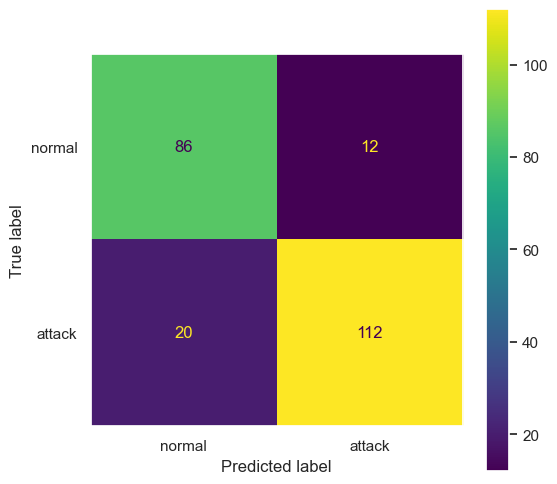

In [47]:
lr = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

**Insights**

- The Logistic regression model generalizes well, with closely aligned training and test scores. It maintains a good balance between precision and recall, serving as a strong baseline model.

### KNeighbors Classifier

Training Accuracy KNeighborsClassifier: 85.61
Test Accuracy KNeighborsClassifier: 84.35
Training Precision KNeighborsClassifier: 86.74
Test Precision KNeighborsClassifier: 88.10
Training Recall KNeighborsClassifier: 86.97
Test Recall KNeighborsClassifier: 84.09


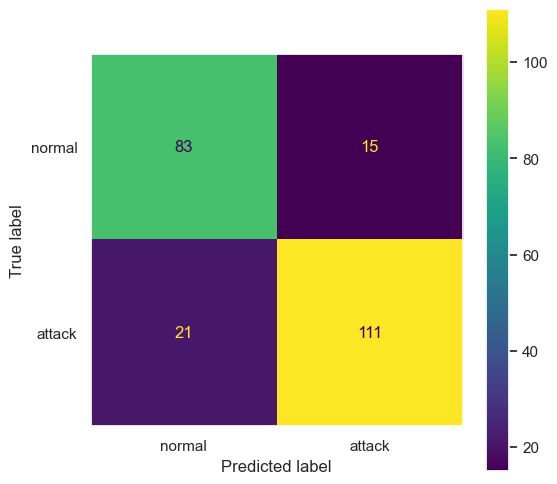

In [46]:
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", X_train, X_test, y_train, y_test)

**Insights**

- The KNN slightly underperforms Logistic Regression.

### Naives Bayes

Training Accuracy GaussianNB: 85.32
Test Accuracy GaussianNB: 84.78
Training Precision GaussianNB: 86.67
Test Precision GaussianNB: 88.80
Training Recall GaussianNB: 86.44
Test Recall GaussianNB: 84.09


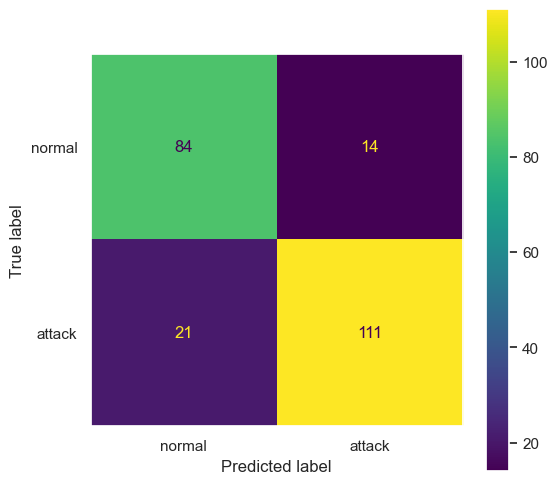

In [48]:
gnb = GaussianNB().fit(X_train, y_train)
evaluate_classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)

**Insights**

- The Naive Bayes models performs similarly to KNN but achieves slightly better test precision. It is efficient and fast but struggles with complex relationships in the data.

### SVM

C:\Users\ADMIN\anaconda3_new\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy Linear SVC(LBasedImpl): 86.19
Test Accuracy Linear SVC(LBasedImpl): 85.22
Training Precision Linear SVC(LBasedImpl): 86.88
Test Precision Linear SVC(LBasedImpl): 90.16
Training Recall Linear SVC(LBasedImpl): 88.03
Test Recall Linear SVC(LBasedImpl): 83.33


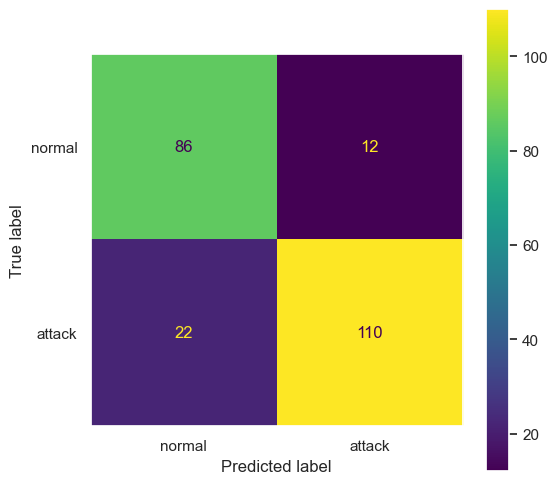

In [49]:
lin_svc = svm.LinearSVC().fit(X_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", X_train, X_test, y_train, y_test)

**Insights**

- The Linear SVC performs on par with Logistic Regression but shows a minor decline in test recall. Its high test precision indicates effective control over false positives.

### Decision Tree

Training Accuracy DecisionTreeClassifier: 100.00
Test Accuracy DecisionTreeClassifier: 81.30
Training Precision DecisionTreeClassifier: 100.00
Test Precision DecisionTreeClassifier: 87.39
Training Recall DecisionTreeClassifier: 100.00
Test Recall DecisionTreeClassifier: 78.79


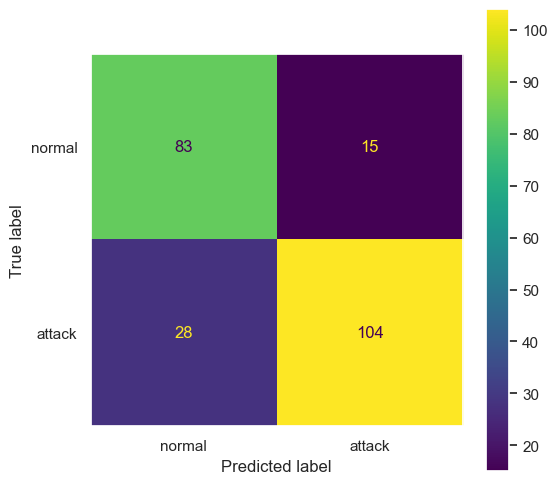

In [50]:
dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
tdt = DecisionTreeClassifier().fit(X_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

**Insights**

- The Decision Tree shows severe overfitting, achieving perfect training scores but poor test accuracy and recall.

### Random Forest

Training Accuracy RandomForestClassifier: 100.00
Test Accuracy RandomForestClassifier: 86.96
Training Precision RandomForestClassifier: 100.00
Test Precision RandomForestClassifier: 90.48
Training Recall RandomForestClassifier: 100.00
Test Recall RandomForestClassifier: 86.36


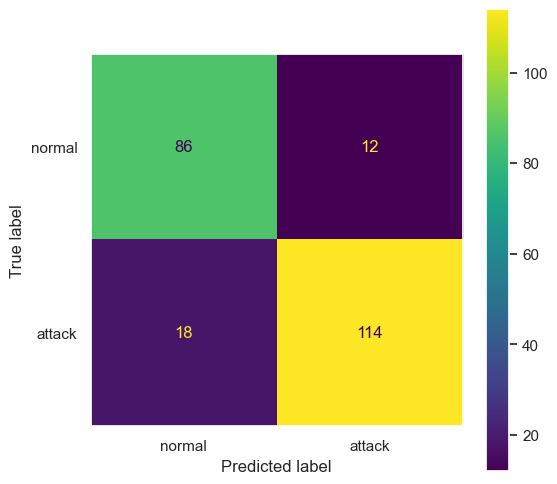

In [51]:
rf = RandomForestClassifier().fit(X_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", X_train, X_test, y_train, y_test)

**Insights**

- The Random Forest delivers strong test results similar to Logistic Regression. However, its perfect training scores suggest overfitting.

### XGB Classifier

Training Accuracy XGBClassifier: 100.00
Test Accuracy XGBClassifier: 85.22
Training Precision XGBClassifier: 100.00
Test Precision XGBClassifier: 90.16
Training Recall XGBClassifier: 100.00
Test Recall XGBClassifier: 83.33


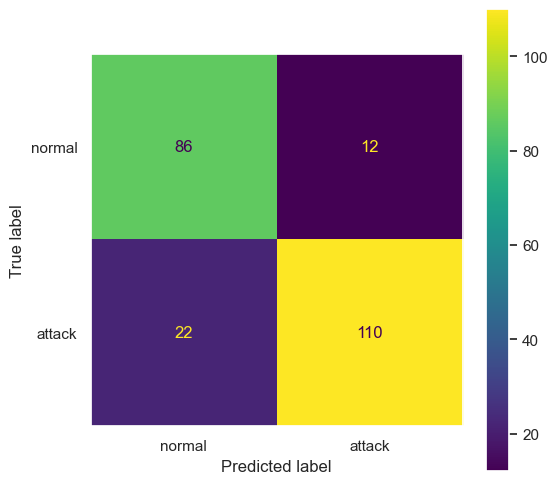

In [52]:
xgb = XGBClassifier().fit(X_train, y_train)
evaluate_classification(xgb, "XGBClassifier", X_train, X_test, y_train, y_test)

**Insights**

- The XGBoost performs well but suffers from significant overfitting on the training data. Test accuracy and recall are slightly lower compared to Random Forest.

### Voting Ensemble

In [53]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC, LinearSVC

In [54]:
# Create base classifiers for the ensemble
base_classifier_dt = DecisionTreeClassifier()
base_classifier_lr = LogisticRegression()
base_classifier_knn = KNeighborsClassifier(n_neighbors=20)
base_classifier_nb = GaussianNB()
base_classifier_rf = RandomForestClassifier()
base_classifier_svc = CalibratedClassifierCV(LinearSVC())
base_classifier_xgb = XGBClassifier()

In [55]:
voting_classifier = VotingClassifier(
    estimators=[
        ('dt', base_classifier_dt),
        ('lr', base_classifier_lr),
        ('knn', base_classifier_knn),
        ('nb', base_classifier_nb),
        ('rf', base_classifier_rf),
        ('svc', base_classifier_svc),
        ('xgb', base_classifier_xgb)
    ],
    voting='soft'  # Use 'soft' voting for probabilities, or 'hard' for majority voting
)

In [56]:
# Fit the voting ensemble on the training data
voting_classifier.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3_new\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3_new\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3_new\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3_new\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ADMIN\anaconda3_new\Lib\site-packag

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier(n_neighbors=20)),
                             ('nb', GaussianNB()),
                             ('rf', RandomForestClassifier()),
                             ('svc',
                              CalibratedClassifierCV(estimator=LinearSVC())),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                 voting='soft')

Training Accuracy Voting Ensemble: 93.90
Test Accuracy Voting Ensemble: 87.83
Training Precision Voting Ensemble: 93.26
Test Precision Voting Ensemble: 91.27
Training Recall Voting Ensemble: 95.74
Test Recall Voting Ensemble: 87.12


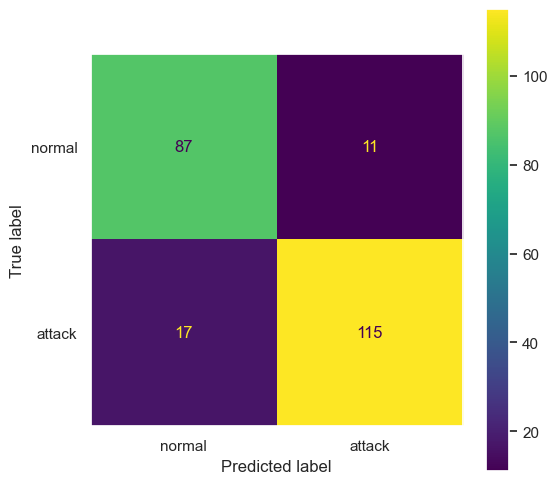

In [57]:
# Evaluate the voting ensemble
evaluate_classification(voting_classifier, "Voting Ensemble", X_train, X_test, y_train, y_test)

**Insights**

- The Voting Ensemble combines the strengths of all models, achieving the highest test accuracy (87.83%) and precision (91.27%) while maintaining good recall (87.12%). It reduces overfitting compared to Random Forest and XGBoost.

## Conclusion:

Voting Ensemble model is the model with the highest test accuracy and precision.
Hence we will be selecting it as our best model that we will be saving.

In [60]:
import joblib

model_filename = 'voting_Heart.pkl'
joblib.dump(voting_classifier, model_filename)
print(f"Voting_classifier model saved as '{model_filename}'")


Voting_classifier model saved as 'voting_Heart.pkl'
